# Cat vs Dog

Dataset from a Kaggle competition: https://www.kaggle.com/c/dogs-vs-cats

First steps with Deep Learning, using what we learnt in the [Machine Learning course](https://github.com/lyloox/machine-learning-course).

## Dataset Preparation

(375, 499, 3)


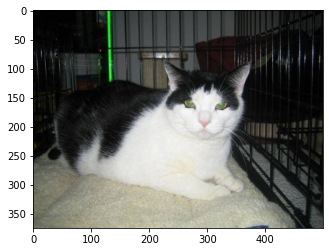

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt

x = imread("catdog/cat.10040.jpg")
print(x.shape)
plt.imshow(x)

In [3]:
import numpy as np

x = np.array(x)
print(x.shape)
print(x)

(375, 499, 3)
[[[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  4   6   5]
  [  5   7   6]
  [  7   9   8]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  2   4   3]
  [  3   5   4]
  [  4   6   5]]

 [[  2   2   2]
  [  2   2   2]
  [  2   2   2]
  ...
  [  2   4   3]
  [  1   3   2]
  [  1   3   2]]

 ...

 [[105 107  93]
  [111 113  99]
  [114 116 102]
  ...
  [ 61  70  67]
  [ 61  70  67]
  [ 61  70  67]]

 [[101 103  89]
  [106 108  94]
  [111 113  99]
  ...
  [ 61  70  67]
  [ 61  70  67]
  [ 61  70  67]]

 [[ 99 101  87]
  [104 106  92]
  [111 113  99]
  ...
  [ 63  72  69]
  [ 63  72  69]
  [ 63  72  69]]]


We need to create a dataset with input X and output y.

To do this, we resize all the images to the same size: arbitrarily 200 * 200 pixels.

We must therefore obtain a shape for X of (n_images, 200, 200, 3) and for y (n_images, 1).

(499, 375) <class 'PIL.JpegImagePlugin.JpegImageFile'> original
(375, 499, 3) <class 'numpy.ndarray'> np.array(original)
(499, 375) <class 'PIL.Image.Image'> grayscale
(375, 499) <class 'numpy.ndarray'> np.array(grayscale)
(200, 200) <class 'numpy.ndarray'> np.array(grayscale_resized)


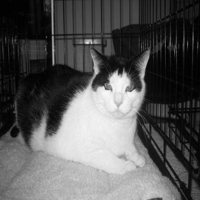

In [4]:
from PIL import Image, ImageOps
import numpy as np

img = Image.open("catdog/cat.10040.jpg")
print(img.size, type(img), "original")

x = np.array(img)
print(x.shape, type(x), "np.array(original)")

img = ImageOps.grayscale(img)
print(img.size, type(img), "grayscale")

x = np.array(img)
print(x.shape, type(x), "np.array(grayscale)")

img = img.resize((200, 200))
x = np.array(img)
print(x.shape, type(x), "np.array(grayscale_resized)")

img

In [5]:
from tqdm import tqdm

for i in tqdm(range(100000)):
  x = i * 2

100%|██████████| 100000/100000 [00:00<00:00, 2117308.78it/s]


In [6]:
from PIL import Image
import numpy as np
import subprocess

X = []
y = []
folder = "catdog"
files = subprocess.run(["ls", folder], capture_output=True).stdout.decode()

for f in tqdm(files.split("\n")):
  if not f:
    continue

  img = Image.open(f"{folder}/{f}")
  # img = ImageOps.grayscale(img)
  img_small = np.array(img.resize((200, 200)))
  
  if f[:3] == "cat":
    X.append(img_small)
    y.append(0)
  elif f[:3] == "dog":
    X.append(img_small)
    y.append(1)
  else:
    print("Error with file", f)

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

100%|██████████| 2001/2001 [00:10<00:00, 183.24it/s]


(2000, 200, 200, 3) (2000,)


In [7]:
print(X.shape, y.shape)

(2000, 200, 200, 3) (2000,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
print(X_train.shape)
print(y_train.shape)

(1500, 200, 200, 3)
(1500,)


Our dataset is now ready for learning.

# Minimal Deep Learning for MNIST Dataset

In [10]:
import tensorflow as tf
from tensorflow import keras

(mnistX_train, mnisty_train), (mnistX_test, mnisty_test) = keras.datasets.mnist.load_data()

In [11]:
print(mnistX_train.shape)
print(mnisty_train.shape)

(60000, 28, 28)
(60000,)


In [12]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(64, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [14]:
model.fit(mnistX_train, mnisty_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1613 - accuracy: 0.8220
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6589 - accuracy: 0.9018
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5568 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5007 - accuracy: 0.9294
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4558 - accuracy: 0.9344


In [15]:
model.evaluate(mnistX_test, mnisty_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7090 - accuracy: 0.9232


[0.7090063095092773, 0.9232000112533569]

# Baseline for Cat vs Dog

In [19]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
  keras.layers.Flatten(input_shape=(200,200, 3)),  # we changed the input_shape (28, 28) => (200, 200, 3)
  keras.layers.Dense(64, activation=tf.nn.relu),
  keras.layers.Dense(2, activation=tf.nn.softmax)  # and the number of output nodes (10 => 2)
])

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
47/47 [==============================] - 5s 98ms/step - loss: 5224.0820 - accuracy: 0.5047
Epoch 2/5
47/47 [==============================] - 5s 96ms/step - loss: 0.6932 - accuracy: 0.4993
Epoch 3/5
47/47 [==============================] - 5s 98ms/step - loss: 0.6932 - accuracy: 0.4833
Epoch 4/5
47/47 [==============================] - 5s 97ms/step - loss: 0.6932 - accuracy: 0.4913
Epoch 5/5
47/47 [==============================] - 5s 97ms/step - loss: 0.6933 - accuracy: 0.4713


In [22]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 21ms/step - loss: 0.6931 - accuracy: 0.5020


[0.6931423544883728, 0.5019999742507935]

# Model using Convolution and MaxPooling + Binary classification

Take time to read from the documentation: https://www.tensorflow.org/guide/keras/train_and_evaluate

In [23]:
model = keras.Sequential([
  # We replace  the first Flatten layer by a Conv2D to preserve the 2D-image
  keras.layers.Conv2D(32, (3, 3), 
                      activation='relu',
                      input_shape=(200, 200, 3)),
  keras.layers.MaxPooling2D((2, 2)),

  # But still need to Flatten before using Dense layers
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation=tf.nn.relu),

  # Last layer = output
  keras.layers.Dense(1, activation='sigmoid')  # changed the number of nodes & activation function
])

model.compile(loss='binary_crossentropy',  # switched loss function from categorical to binary
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=64, epochs=2)

Epoch 1/2
24/24 [==============================] - 45s 2s/step - loss: 2418.1973 - accuracy: 0.5100
Epoch 2/2
24/24 [==============================] - 43s 2s/step - loss: 64.3082 - accuracy: 0.4980


Our accuracy improved, which is a good sign!

# VGG model

* X blocks of Convolution + MaxPooling 
* SGD Optimizer


In [24]:
model = keras.Sequential([
  # 2D features
  ## 1st block
  keras.layers.Conv2D(32, (3, 3), activation='relu',
                      input_shape=(200, 200, 3)),
  keras.layers.MaxPooling2D((2, 2)),

  ## 2nd block
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),

  ## 3rd block
  keras.layers.Conv2D(128, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D((2, 2)),

  # Flat features
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation=tf.nn.relu),

  # Last layer = output
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=64, epochs=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/2
24/24 [==============================] - 74s 3s/step - loss: 119.5162 - accuracy: 0.4887
Epoch 2/2
24/24 [==============================] - 73s 3s/step - loss: 0.6939 - accuracy: 0.5007


# Prevent overfitting

* Adding regularization layers (Dropout, Gaussian)
* Early stopping
* Changing learning rate (Adam optimizer?)